In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uproot
from concurrent.futures import ThreadPoolExecutor
import os
import glob
import re
from tqdm import tqdm
import imageio

import matplotlib.animation as animation

In [3]:

files=glob.glob("./build/dump/data_root/*root")

sorted_files = sorted(files, key=lambda x: int(re.search(r'\d+', x).group()))
#sorted_files = sorted(files, key=lambda x: int(re.search(r'\d+', x).group()))

In [4]:
sorted_files

['./build/dump/data_root/output0.root',
 './build/dump/data_root/output_str_no_deacy_1.root',
 './build/dump/data_root/output_2k.root',
 './build/dump/data_root/output_2k_without.root',
 './build/dump/data_root/output_10000000.root',
 './build/dump/data_root/output_100000000_without.root',
 './build/dump/data_root/output_100000000.root']

In [5]:
dump=[]
labels=[]
for file in sorted_files:
    labels.append(file)
    workers=8

    decompression_executor = ThreadPoolExecutor(max_workers=workers)
    interpretation_executor = ThreadPoolExecutor(max_workers=workers)


    with uproot.open(file) as file:
        tree = file['B4;1']
        braunches=['Edep']
        dump.append(tree.arrays( braunches,library="np", 
            decompression_executor=decompression_executor, 
            interpretation_executor=interpretation_executor)['Edep'])

    
 

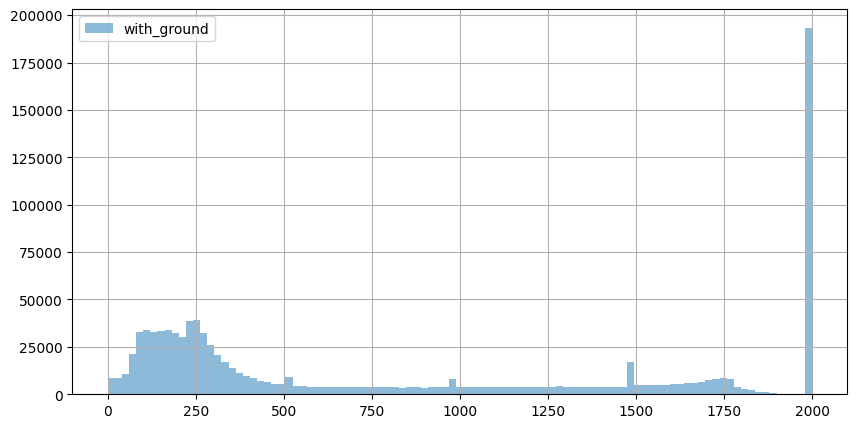

In [6]:
plt.figure(figsize=(10,5))
plt.hist(dump[0], bins=np.linspace(0,2000,100),alpha=0.5,label='with_ground')
#a=plt.hist(dump[1], bins=np.linspace(400,1000,100),alpha=0.5,label='without_ground')
plt.grid(True)
plt.legend()


In [6]:
np.where(a[0]==36)

NameError: name 'a' is not defined

In [25]:
a[1][77]

np.float64(977.7777777777778)

(array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]),
 array([600.        , 601.01010101, 602.02020202, 603.03030303,
        604.04040404, 605.05050505, 606.06060606, 607.07070707,
        608.08080808, 609.09090909, 610.1010101 , 611.11111111,
        612.12121212, 613.13131313, 614.14141414, 615.15151515,
        616.16161616, 617.17171717, 618.18181818, 619.19191919,
        620.

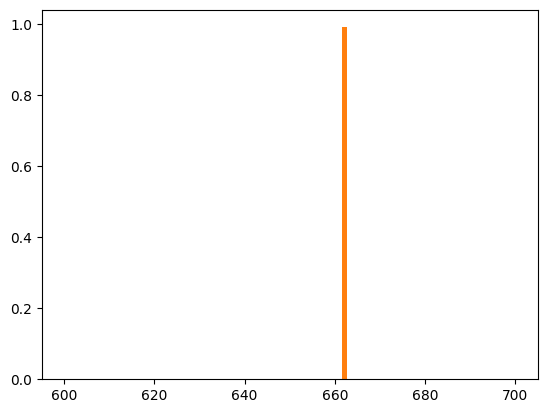

(array([ 3.,  4.,  4.,  2.,  5.,  5.,  5.,  5.,  1.,  6.,  4., 10.,  5.,
         7.,  8.,  8.,  5., 11.,  7.,  7.,  8., 10.,  9.,  8.,  4.,  6.,
         9.,  5., 10.,  8.,  7.,  7.,  6.,  6.,  9.,  3.,  0.,  0.,  2.,
         5.,  1.,  2.,  2.,  0.,  3.,  2.,  1.,  0.,  0.,  3.,  1.,  0.,
         2.,  1.,  1.,  2.,  0.,  0.,  2.,  2.,  2.,  2.,  0.,  1.,  2.,
         1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0., 13.,  0.,  0.,  0.,  0.,  0.]),
 array([  0.        ,   7.07070707,  14.14141414,  21.21212121,
         28.28282828,  35.35353535,  42.42424242,  49.49494949,
         56.56565657,  63.63636364,  70.70707071,  77.77777778,
         84.84848485,  91.91919192,  98.98989899, 106.06060606,
        113.13131313, 120.2020202 , 127.27272727, 134.34343434,
        141.41414141, 148.48484848, 155.55555556, 162.62626263,
        169.6969697 , 176.76767677, 183.83838384, 190.9

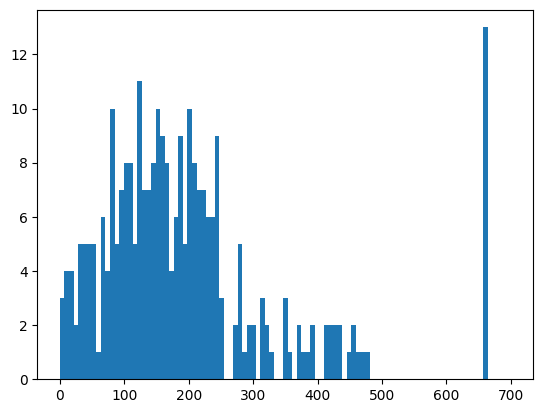

In [48]:
plt.hist(dump[1], bins=np.linspace(0,700,100))

In [51]:
len(dump[2])

2812